### -----------------------------librerías extra

In [1]:
using ProgressMeter
using Cubature
using PyPlot

INFO: Loading help data...


### -----------------------------------Funciones para graficar

In [2]:
function grafdensidad(xmap::Vector{Float64},ymap::Vector{Float64},numero::Integer,z::Array{Float64,2},titulo::ASCIIString,xlab::ASCIIString,ylab::ASCIIString)    
    x = linspace(xmap[1],xmap[2],numero);
    y = linspace(ymap[1],ymap[2],numero);
    xgrid = repmat(x',numero,1);
    ygrid = repmat(y,1,numero);
    

    pcolormesh(xgrid,ygrid, z)
    
    xlabel(xlab) 
    ylabel(ylab)
    title(titulo)
    colorbar()
end


function gencodominio2D(xg::Vector{Float64},yg::Vector{Float64},resolucion::Integer,f::Function)
		x = linspace(xg[1],xg[2],resolucion);
		y = linspace(yg[1],yg[2],resolucion);
		z= zeros(resolucion,resolucion);
		                # x equivale a r , y a z
	    
		for i in 1:length(x)
		    for j in 1:length(y)
		        z[i,j]=f(y[i], x[j])
		    end
		end
	    
	    return z    
	end



gencodominio2D (generic function with 1 method)

### ----------------------------constantes

### ----------------------------

In [3]:
const m = 1.0;
const hbarr = 1.0;
#n = 1.;
const ωz = 0.05;
const ωr = 7.0*ωz;
const n=1;
const α=10.0;
const g_α=4.0*π*α;
const ωm=(ωr*ωz)^(1/3);
const μ=0.5*ωm*(15*α*sqrt(m*ωm))^(2.0/5.0);

const c = sqrt(n*g_α/m);

### -------------

### -------------parámetros característicos del solitón bosónico

In [4]:
ξ=0.1;
β=0.0;
z0=66.0*ξ;
γ=1/(sqrt(1-β^2));

### ----Función de onda

In [5]:

function N(t::Float64)
    (1/sqrt(2*pi))*(ωr/sin(ωr*t))*sqrt(ωz/sin(ωz*t))
end

function sol(z::Float64)
(tanh((z-z0)/(ξ*γ)))/γ
end


function ϕ_rr1(r::Float64,r1::Float64,t::Float64)
    (m*ωr/(2*hbarr))*(r1^2+r^2)*tan(ωr*t)+ pi/4
end

function ϕ_zz1(z::Float64,z1::Float64,t::Float64)
    (m*ωz/(2*hbarr))*(z1^2+z^2)*tan(ωz*t)-2*z*z1*t
end

function Rre(r::Float64,r1::Float64,t::Float64)
    besselj0(-m*ωr*r*r1/(hbarr*sin(ωr*t)))*r1*cos(ϕ_rr1(r,r1,t))
end

function Rim(r::Float64,r1::Float64,t::Float64)
    besselj0(-m*ωr*r*r1/(hbarr*sin(ωr*t)))*r1*sin(ϕ_rr1(r,r1,t))
end

function Zre(z::Float64,z1::Float64,t::Float64)
    cos(ϕ_zz1(z,z1,t))*sol(z')-β*sin(ϕ_zz1(z,z1,t))
end

function Zim(z::Float64,z1::Float64,t::Float64)
    sin(ϕ_zz1(z,z1,t))*sol(z')+β*cos(ϕ_zz1(z,z1,t))
end

function U(r::Float64,z::Float64)
                    (1/2)*m*((ωr*r)^2 + (ωz*z)^2)
                    end

function n_tf(r::Float64,z::Float64)            
    if  μ-U(r,z)>0 0
        return (μ-U(r,z))/(n*g_α)              
    end
    return 0       
end

n_tf (generic function with 1 method)

In [6]:
const rmaxintegrar=sqrt(2*μ/m)/ωr;
const rminintegrar=0;
const zmaxintegrar=sqrt(2*μ/m)/ωz;
const zminintegrar=-sqrt(2*μ/m)/ωz;

rmaxevaluar=rmaxintegrar;
rminevaluar=0.0;
zmaxevaluar=zmaxintegrar;
zminevaluar=-zmaxevaluar;


## EL TIEMPO

In [70]:
t0=1/sqrt(ωr^2+ωz^2);
DT=10;
t=t0*DT;


In [55]:
tan(cos(ωz*t))

-0.004968703021116328

In [56]:
zmaxevaluar

24.258048343234655

# Propagar Perfil inicial

In [57]:
iteracionesr1=integer(500);
iteracionesz1=integer(500);
iteracionesr=integer(100);
iteracionesz=integer(100);

iteracionest=2;


Dr1=(rmaxintegrar-rminintegrar)/iteracionesr1;
Dz1=(zmaxintegrar-zminintegrar)/iteracionesz1;

Dr=(rmaxevaluar-rminevaluar)/iteracionesr;
Dz=(zmaxevaluar-zminevaluar)/iteracionesz;


#Arreglos vacíos para guardar los resultados

fRre=zeros(iteracionesr+1,iteracionesr1+1);
fRim=zeros(iteracionesz+1,iteracionesz1+1);

gZre=zeros(iteracionesz+1,iteracionesz1+1);
gZim=zeros(iteracionesz+1,iteracionesz1+1);

comodin=gZre;

ReIntegral=zeros(iteracionesr+1,iteracionesz+1);
ImIntegral=zeros(iteracionesr+1,iteracionesz+1);


for i in 1: iteracionesr+1
    r=(i-1)*Dr   
    #println("r=====$r")
    for k in 1:iteracionesr1+1
        r1=(k-1)*Dr1;    
        #println("r1=$r1")
        fRre[i,k]=Rre(r,r1,t);
        fRim[i,k]=Rim(r,r1,t);
        #comodin[i,j]=r*r1;
    end    
end


for j in 1: iteracionesz+1
    z=zminevaluar+(j-1)*Dz
    for l in 1:iteracionesz1+1                             
        z1=zminintegrar+(l-1)*Dz1;    
        gZre[j,l]=Zre(z,z1,t);
        gZim[j,l]=Zim(z,z1,t);
    
    end    
end


### Longitudes caracteristicas del propagador 

In [58]:
Dr1_ωr=sqrt(hbarr/(m*ωr))/5; #Dr1_ωr>Dr1
Dz1_ωz=sqrt(hbarr/(m*ωz))/5; #Dz1_ωz>Dr1

#Dr1_ωr=Dr1;
#Dz1_ωz=Dz1;
############valores en índices
dzl0=    iround(Dz1_ωz/Dz1);
drk0=    iround(Dr1_ωr/Dr1); #a lo más, se va a integrar 2*drk0*N_arbitrario puntos+1 al rededor de un punto dado (contando al punto)

49

In [59]:
drk0*2

98

In [60]:
dzl0*2

18

In [61]:
function indicializar_abajo(x,xmin,d)
    i0=(x-xmin)/d
    i0=iround(floor(i0))+1
end

function indicializar_arriba(x,xmin,d)
    i0=(x-xmin)/d
    i0=iround(ceil(i0))+1
end

indicializar_arriba (generic function with 1 method)

### Reglas para sumar x+Dx_ωx y quedarse en el dominio de integracion

In [62]:
function valor_r1_abajo(r::Float64,dr::Float64)

    if  r-dr<0.0
        return 0.0
    end
    
    return r-dr;        
end



function valor_r1_arriba(r::Float64,dr::Float64,rmax::Float64)
    if  r+dr>rmax
        return rmax    
    end
    return r+dr;        
end


valor_z1_arriba(z,dz,zmax)=valor_r1_arriba(z,dz,zmax)

function valor_z1_abajo(z::Float64,dz::Float64,zmin::Float64)
    if  z-dz<zmin
        return zmin    
    end
    return z-dz;        
end

valor_z1_abajo (generic function with 1 method)

In [63]:
typeof(valor_r1_abajo(5.0,5000.0))

Float64

In [64]:
Dr/Dr1_ωr

0.10250896384347406

In [65]:
zminintegrar+Dz*iteracionesz

24.258048343234655

In [66]:
Dz/Dz1_ωz

0.5424264509694884

In [67]:
p=Progress(iteracionesr+1,1)

tic()

for i in 1: iteracionesr+1
    #println("i====================$i") 
    r=(i-1)*Dr;    
   

    for j in 1: iteracionesz+1
        #println("j===========$j") 
        z=zminevaluar+(j-1)*Dz;    



        r1_minimo=valor_r1_abajo(r,Dr1_ωr); #r+Dr1_ωr con reglas
        r1_maximo=valor_r1_arriba(r,Dr1_ωr,rmaxintegrar); #r-Dr1_ωr con reglas

        z1_minimo=valor_z1_abajo(z,Dz1_ωz,zminintegrar); #z-Dz1_ωz con reglas
        z1_maximo=valor_z1_arriba(z,Dz1_ωz,zmaxintegrar); #z+Dz1_ωz con reglas



        for k in indicializar_abajo(r1_minimo,rminintegrar,Dr1): indicializar_arriba(r1_maximo,rminintegrar,Dr1) #induce error de redondeo    
        #for k in 1: iteracionesr1+1
            r1=(k-1)*Dr1;
            
            #println("k====$k") 
            #println("kmin====$(indicializar(r1_minimo,rminintegrar,Dr1))")
            #println("kmax====$(indicializar(r1_maximo,rminintegrar,Dr1))")

            #println("r1===","$r1")

            for l in indicializar_abajo(z1_minimo,zminintegrar,Dz1): indicializar_arriba(z1_maximo,zminintegrar,Dz1) #induce error de redondeo
            #for l in 1:iteracionesz1+1
            #println("l==$l")   

                #println("$(indicializar(r1_minimo,rminintegrar,Dr1))", "$(indicializar(r1_maximo,rminintegrar,Dr1))")

                #println("lmin==$(indicializar(z1_minimo,zminintegrar,Dz1))")
                #println("lmax==$(indicializar(r1_minimo,zminintegrar,Dz1))")
                
                z1=zminintegrar+(l-1)*Dz1;

                #println("z1=","$z1")
             
                
                
                
                #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                    
                ReIntegral[i,j]=n_tf(r1,z1)*(fRre[i,k]*gZre[j,l]-fRim[i,k]*gZim[j,l])*Dr1*Dz1;   
                ImIntegral[i,j]=n_tf(r1,z1)*(fRre[i,k]*gZim[j,l]+fRim[i,k]*gZre[j,l])*Dr1*Dz1;
            
            
                #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                #   ReIntegral[i,j]=n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                 #  ImIntegral[i,j]=n_tf(r1,z1)*(Rre(r,r1,t)*Zim(z,z1,t)+Rim(r,r1,t)*Zre(z,z1,t))*Dr1*Dz1;
            end
        
        end
        
  
    end

    next!(p)
end

toc()


Progress: 100% Time: 0:00:41
elapsed time: 41.288934236 seconds


41.288934236

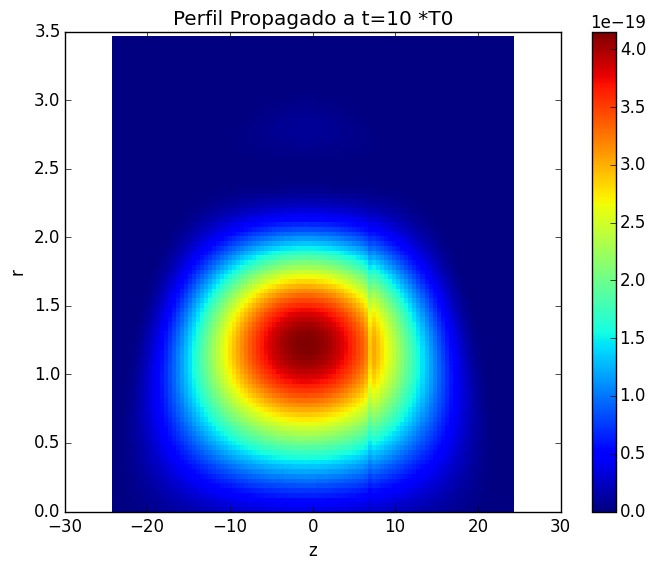

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f70db955fc8>

In [72]:
ReIntegral=ReIntegral*N(t);
ImIntegral=ImIntegral*N(t);
Z=ReIntegral.^2+ImIntegral.^2;
grafdensidad([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],length(ReIntegral[:,1]),Z,"Perfil Propagado a t=$DT *T0","z","r")    

#El perfil inicial 

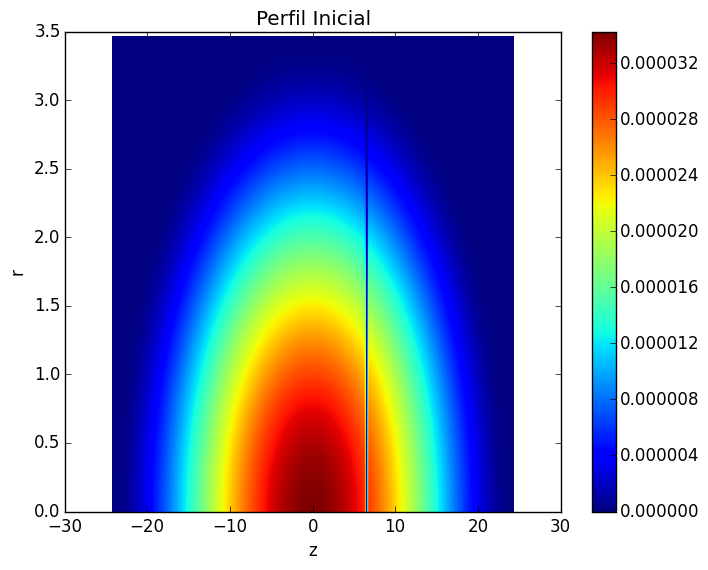

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f70d992d320>

In [22]:
resolucion=1000;

perfilinicial=zeros(resolucion+1,resolucion+1)

function FUNCIONTF0(r::Float64,z::Float64)
    n_tf(r,z)*(sol(z)+im*β)
end

function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end

perfilinicial=gencodominio2D([zminintegrar,zmaxintegrar],[rminintegrar,rmaxintegrar],resolucion,ρ0);
grafdensidad([zminintegrar,zmaxintegrar],[rminintegrar,rmaxintegrar],resolucion+1, perfilinicial,"Perfil Inicial","z","r")

## líneas de nivel

for i in 1:100
    z=linspace(zmin,zmax,resolucion)
    PyPlot.plot(z,perfilinicial[i,:]')
    PyPlot.xlabel("z")
    PyPlot.ylabel("ρ")
    PyPlot.title("dejando r constante y variando z")
    #PyPlot.legend("$i")
end

for i in 1:100
        r=linspace(0,rmax,resolucion)

    PyPlot.plot(r,perfilinicial[:,i])
    #PyPlot.legend("$i")
    PyPlot.xlabel("r")
    PyPlot.ylabel("ρ")
    PyPlot.title("Dejando z constante y variando r")
end

## Es lo mismo que con las hcubature (faltan las expresiones en forma vectorial):

In [144]:
function vectorizar_funcion_4_variables(f::Function,v::Array{Float64,1})
    f=f(v[1],v[2],v[3],v[4]) 
end

function vectorizar_funcion_2_variables(f::Function,v::Array{Float64,1})
    f=f(v[1],v[2],t) 
end

Rre(v)=Rre(r,r1,10*t0);
Rim(v)=Rim(r,r1,10*t0);
Zre(v)=Zre(z,z1,10*t0);
Zim(v)=Zim(z,z1,10*t0);

In [145]:
hcubature(Zre, [-1.0,-1.0], [1.0,1.0]; reltol=1e-6, abstol=1e-6, maxevals=100000);

LoadError: z not defined
while loading In[145], in expression starting on line 1

### y siguen faltando...

p=Progress(iteracionesr+1,1)
for i in 1: iteracionesr+1
    r=(i-1)*Dr;    
    #println("r==========$i")
    for j in 1: iteracionesz+1
        z=zminevaluar+(j-1)*Dz;
        #println("z=====$j")
        for k in 1: drk0
        #for k in 1:iteracionesr1+1     
            r1=(k-1)*Dr1;
            #println("r1===$k")
            for l in l0-Numz: l0+Numz
            #for l in 1:iteracionesz1+1
                z1=zminintegrar+(l-1)*Dz1;
                #println("z1=$l")
                
                #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                ReIntegral[i,j]=ReIntegral[i,j]+integrarfunción de onda en todo el dominio de r1,z1;
                ImIntegral[i,j]=ImIntegral[i,j]+integrarfunción de onda en todo el dominio de r1,z1;
            
            
                #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                #ReIntegral[i,j]=ReIntegral[i,j]+n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                #ImIntegral[i,j]=ImIntegral[i,j]+n_tf(r1,z1)*(fRre[i,k]*gZim[j,l]+fRim[i,k]*gZre[j,l])*Dr1*Dz1;
            end
        
        end
        
    end

    next!(p)
end


ReIntegral=ReIntegral*N(t);
ImIntegral=ImIntegral*N(t);

Z=ReIntegral.^2+ImIntegral.^2;
grafdensidad([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],101,Z,"eso","z","r")    

In [101]:
typeof([1,2,3])

Array{Int64,1}

vectorizar_funcion_2_variables (generic function with 1 method)

In [121]:
f(x,y,z,t)=x^2+y^2;

g(v)=vectorizar_funcion_4_variables(f,v)

g (generic function with 1 method)

In [126]:
methods(Zre)

# 1 method for generic function "Zre":
Zre(z::Float64,z1::Float64,t::Float64) at In[4]:28